In [4]:
#http://songhuiming.github.io/pages/2016/12/31/linear-regression-in-python-chapter-2/
#This exercise applies the above tutorial to diamonds dataset & identifies outliers in regression model

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import copy
import math
import time
import plotly.plotly as py
import plotly.graph_objs as go

%matplotlib inline 

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [5]:
df = pd.read_csv('diamonds.csv',index_col=0)

In [6]:
df = df[1:1000] #reduce size of dataset to only 1000 records
df = df[['carat','cut','color','clarity','price']]

In [27]:
df.head()

,carat,cut,color,clarity,price
2,0.41,Ideal,J,VS2,637
3,0.60,Ideal,G,VVS2,2190
4,0.73,Ideal,D,VS2,3528
5,0.40,Ideal,E,VS2,912
6,0.73,Very Good,G,SI1,2330


In [28]:
df.describe()

,carat,price
count,999.000000,999.000000
mean,0.794474,3903.644645
std,0.478742,4039.994247
min,0.230000,326.000000
25%,0.400000,980.000000
50%,0.700000,2228.000000
75%,1.030000,5176.000000
max,2.630000,18692.000000


In [9]:
df[df.isnull().any(axis=1)].count()  #No null records

carat      0
cut        0
color      0
clarity    0
price      0
dtype: int64

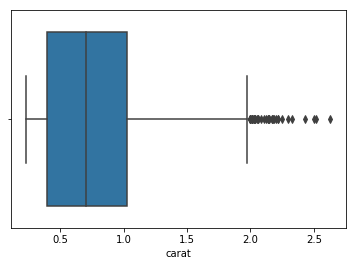

In [11]:
sns.boxplot(x=df["carat"])  #Explore the carat/size of diamonds

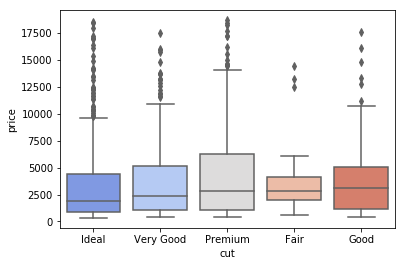

In [29]:
sns.boxplot(x="cut", y="price", data=df, palette="coolwarm")  #explore how cuts of diamonds effect price

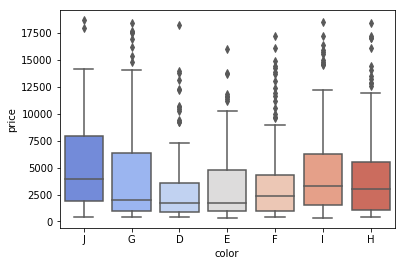

In [31]:
sns.boxplot(x="color", y="price", data=df, palette="coolwarm")  #explore how color of diamonds effect price

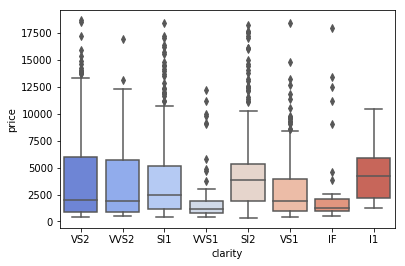

In [32]:
sns.boxplot(x="clarity", y="price", data=df, palette="coolwarm")  #explore how clarity of diamonds effect price

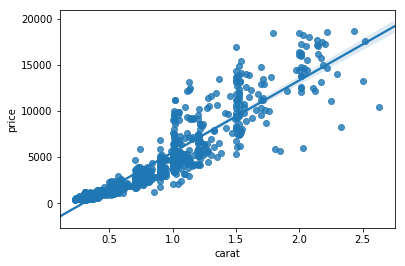

In [13]:
sns.regplot(x=df["carat"],y=df["price"])  #explore relationship between carat & price

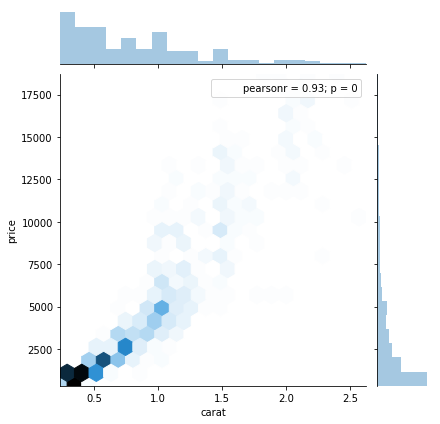

In [14]:
sns.jointplot(x='carat',y='price',data=df,kind='hex')  #view distributions of both price & carat

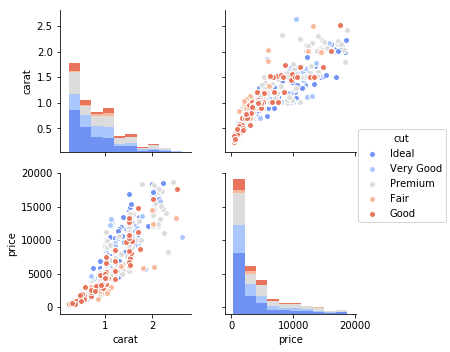

In [15]:
sns.pairplot(df,hue='cut',palette='coolwarm')

In [16]:
lm = smf.ols(formula = "price ~ cut + color + clarity + carat", data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     681.3
Date:                Tue, 14 Aug 2018   Prob (F-statistic):               0.00
Time:                        15:19:08   Log-Likelihood:                -8412.2
No. Observations:                 999   AIC:                         1.686e+04
Df Residuals:                     980   BIC:                         1.696e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -7753.4747    345.100  



Leverage v.s. Studentized Residuals


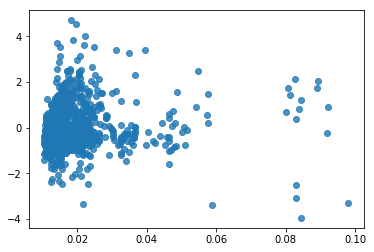

In [19]:
influence = lm.get_influence()
resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

print( '\n')
print( 'Leverage v.s. Studentized Residuals')
sns.regplot(leverage, lm.resid_pearson,  fit_reg=False)

In [22]:
df_res = pd.concat([pd.Series(cooks, name = "cooks"), pd.Series(dffits, name = "dffits"), pd.Series(leverage, name = "leverage"), pd.Series(resid_student, name = "resid_student")], axis = 1)
df_res = pd.concat([df, df_res], axis = 1)
df_res.describe()

,carat,price,cooks,dffits,leverage,resid_student
count,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000
mean,0.794474,3903.644645,1.360448e-03,0.002921,0.019019,0.000777
std,0.478742,4039.994247,4.860647e-03,0.161316,0.011291,1.005821
min,0.230000,326.000000,2.610434e-10,-1.264741,0.010486,-4.168344
25%,0.400000,980.000000,6.647495e-05,-0.079647,0.013032,-0.621838
50%,0.700000,2228.000000,2.892478e-04,-0.020992,0.015439,-0.156607
75%,1.030000,5176.000000,8.327348e-04,0.056601,0.020845,0.454588
max,2.630000,18692.000000,8.280432e-02,0.711224,0.098090,4.802559


In [25]:
print(df_res[abs(df_res.resid_student) > 4])

     carat        cut color clarity   price     cooks    dffits  leverage  \
184   0.84  Very Good     G     SI2  2584.0  0.082804 -1.264741  0.084300   
634   0.50      Ideal     D     VS1  1893.0  0.022241  0.656860  0.019595   
728   0.38      Ideal     G     SI1   639.0  0.022146  0.655938  0.018313   
975   1.03  Very Good     D     SI2  4478.0  0.019703  0.616768  0.022085   

     resid_student  
184      -4.168344  
634       4.646196  
728       4.802559  
975       4.104123  


In [26]:
print(df_res[abs(df_res.cooks) > .04])

     carat        cut color clarity    price     cooks    dffits  leverage  \
184   0.84  Very Good     G     SI2   2584.0  0.082804 -1.264741  0.084300   
267   0.30      Ideal     H     SI1    407.0  0.068321 -1.145761  0.098090   
404   1.66    Premium     J    VVS2  10062.0  0.040089 -0.877790  0.058721   
779   0.31  Very Good     E      IF   1209.0  0.049606 -0.975541  0.082877   

     resid_student  
184      -4.168344  
267      -3.474264  
404      -3.514411  
779      -3.245213  


In [ ]:
#Negative resid_student & cooks correspond with undervalued predictions in .R model using regression trees
#NOTE: this model does not take into account all records in the dataset